<h3>MIET2039 Computer Lab 01 - A Powerful Calculator</h3>
<img src="img/python-logo-notext.png", width=50, height=70, align="left" />
<p>Welcome to MIET2039 Applied Heat and Mass Transfer computer labs where we will use computer scripts to solve many problems, automate a lot of processes, and solve many engineering problems. The choice of Python as the computer language to use was due to its accessibility for you to continue to use after you graduate. I hope by that this course will enrich your learning and provide you with a new set of skills that will help you accelerate a lot of your work processes.</p>


<p style="color:#4799ff;">EXERCISE 1.1</p><ul>
<li>Type 	a = 10 </li><li>Press 	Ctrl+Enter	(where’s the result??) </li><li>Type b = 20 and press Ctrl+Enter (still no result?!)</li></ul>
well it is there but it’s stored as a variable in the background

Actually we can write the two commands (or any number of commands) in the same cell. Let’s start again. Delete the contents in the cells. Re-enter the above commands and then print out the values by: <br>
print(a) <br>
print(b) <br>

You can mix text (strings) with the variables <br>
e.g.
print(‘The value of a is’, a)


<p style="color:#4799ff;">EXERCISE 1.2</p>
<p>Try the following:</p>
<img src="img/CL01-arithmetic-small.png", width=671, height=244, align="left" /> 

<p>Let's revisit the thermal resistance problem from the lecture.</p>

<img src="img/CL01-resistances.png", width=150, height=270, align="left" /> The wall of a cold room is composed of three layers:  The outside layer is brick 0.21 m thick, the middle layer is cork 0.10 m thick, and the inside layer is cement 0.050 m thick.  The wall is 2 m high and 5 m long.  Thermal conductivities are:  brick 0.70; cork 0.44; cement 1.15 W/(m.K).  The temperature of the outside air is 27°C and the inside air is -23°C.  The convective film coefficients are 48 W/(m².K) for the outside air to brick and 17 W/(m².K) for the inside air to cement.  Determine:<br>
a)	the thermal resistance of the wall including the air boundary layers<br>
b)	the overall heat transfer coefficient<br>
c)	the rate of heat flow under steady conditions<br> 
d)	the temperature on the internal wall surface.

<p>To begin recall the equations needed:</p>
$$
\begin{align}
R_{conv} = \frac{1}{hA} \;\;\;\;\;\; R_{cond} = \frac{L}{kA} \;\;\;\;\;\; \dot{Q} = \frac{\Delta T}{R_{total}}
\end{align}
$$

<p style="color:#4799ff;">EXERCISE 1.3</p>
<ul>
<li>Define all the variables 	kBrick = 0.7; kThick = 0.21; …..etc</li><li>Add comments by using 	# </li><li>Calculate the resistances for store the values as RBrick, RCork, RCement, Rin, Rout</li><li>Add the resistances together as and store it as RTotal</li><li>Calculate the temperature difference and store it as TDiff</li><li>Calculate the heat transfer rate and store it as QDotTotal</li>
</ul>

<p style="color:#4799ff;">EXERCISE 1.4</p>
Load up the modules by entering the import command.

import numpy as np

In [8]:
# hash will allow comments on the line

# let's assign the material properties to a variable
k_brick =  0.70; L_brick = 0.21
k_cork = 0.44; L_cork = 0.10
k_cement = 1.15; L_cement = 0.05
h_in = 17
h_out = 48

# why do we sometimes use a semi-colon?
Area = 10

R_brick = L_brick / (k_brick * Area)
R_cork = L_cork / (k_cork * Area)
R_cement = L_cement / (k_cement * Area)
R_in = 1/(h_in*Area)
R_out = 1/(h_out*Area)

In [10]:
print(R_in, R_out, R_cement, R_cork, R_brick)

0.0058823529411764705 0.0020833333333333333 0.004347826086956522 0.022727272727272728 0.03


Let's use a function def to simplify the task of typing repeated equations

In [11]:
def cond(L,k,A):
    R = L/(k*A)
    return (R)

cond(0.21,0.7,10)
# note that when we don't assign the calculation to any variable the value is printed in the Output    

0.03

In [12]:
condT = cond(0.21,0.7,Area)+cond(0.1,0.44,Area)

Now type out yourself a function for convection resistance

In [ ]:
def conv(h,A):
    R = 1/(h*A)
    return (R)

In [23]:
def cond(L,k,A):
    R = L/(k*A)
    return (R)

def conv(h,A):
    R = 1/(h*A)
    return (R)

#from outside and move directions in
#conduction properties
LList = [0.21, 0.10, 0.05]
kList = [0.7, 0.44, 1.15]
AList = [10,10,10]

#convection properties
hList = [48,17]
AList2 = [10,10]

# create empty arrays to store the answers
condStore = []
convStore = []

for i in range(3):
    condAns = cond(LList[i], kList[i], AList[i])
    condStore.append(condAns)
    if i < 2:
        convAns = conv(hList[i], AList[i])
        convStore.append(convAns)

totalR = sum(condStore) + sum(convStore)
print(totalR)

U = 1/(totalR*10)
print(U)

Q = U*10*(27-(-23))
print(Q)

0.06504078508873906
1.537496816244822
768.748408122411


[ 0.    0.21  0.31  0.36]
[ 0.00208333  0.03208333  0.05481061  0.05915843]
[ 25.39844082   2.33598857 -15.13556616 -18.47795054]


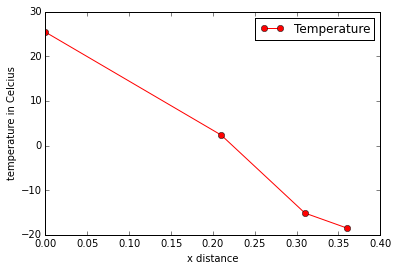

In [47]:
#let's plot
#we add this line to plot inline in Notebooks

%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

Tout = 27
Tin = -23

xDist = np.insert(np.cumsum(LList),0,0)

#since Resistance is in series we can use cumulative sum again for the resistances
RDist = np.insert(np.cumsum(condStore),0,0) + convStore[0]
TDist = Tout - (Q * RDist)

print(xDist)
print(RCum)
print(TDist)

plt.plot(xDist, TDist,'o-r', label='Temperature')
plt.legend()
plt.xlabel('x distance')
plt.ylabel('temperature in Celcius')

# from itertools import accumulate
# list(accumulate(condStore))

In [19]:
sum(condStore)

0.05707509881422925

In [34]:
27-45


-18